### Required Code from the exercise, that you can just hide !!!!


OK
OK
 Volume in drive C is OS
 Volume Serial Number is 4EAC-DAC7

 Directory of C:\Users\jeppe\Desktop\MAL

09/06/2024  11:20 AM    <DIR>          .
09/06/2024  11:20 AM    <DIR>          ..
09/06/2024  11:21 AM    <DIR>          .ipynb_checkpoints
09/06/2024  12:20 AM            25,869 cost_function.ipynb
08/28/2019  11:07 AM    <DIR>          datasets
09/06/2024  10:39 AM           302,756 dummy_classifier.ipynb
06/28/2024  03:26 PM    <DIR>          gitmal-master
06/05/2024  01:12 AM    <DIR>          handson-ml3-main
09/06/2024  11:09 AM           318,296 intro.ipynb
09/02/2024  01:18 AM            17,975 modules_and_classes.ipynb
09/06/2024  12:31 AM            13,993 performance_metrics.ipynb
09/06/2024  11:19 AM            17,097 Untitled.ipynb
               6 File(s)        695,986 bytes
               6 Dir(s)  505,203,826,688 bytes free

OK


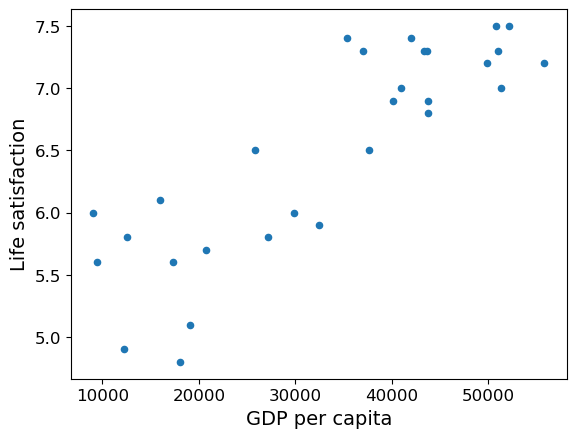

[[5.96242338]]
OK


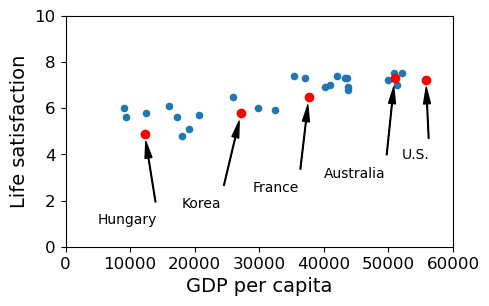

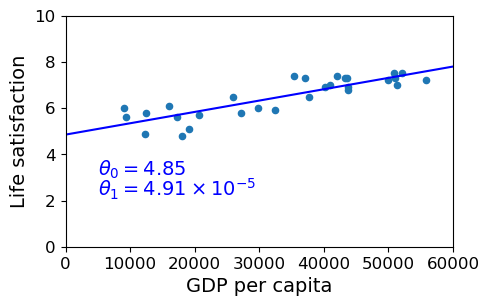

OK


In [5]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # SWMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

print("OK")

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

print("OK")

import os
datapath = os.path.join("./datasets", "lifesat", "")

# NOTE: a ! prefix makes us able to run system commands..
# (command 'dir' for windows, 'ls' for Linux or Macs)
#

! dir 

print("\nOK")

# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
try:
    oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
except Exception as e:
    print(f"SWMAL NOTE: well, you need to have the 'datasets' dir in path, please unzip 'datasets.zip' and make sure that its included in the datapath='{datapath}' setting in the cell above..")
    raise e
    
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

print("OK")

oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

t0 = 4.8530528
t1 = 4.91154459e-05

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
M=np.linspace(0, 60000, 1000)
plt.plot(M, t0 + t1*M, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()

print("OK")


### Forside

SWMAL
Opgavesæt 1 [O1)
introduktion til MAL.
13 september 2024
Gruppenr: 1 


Jeppe Emil Smedegaard Pape (202008596)
Kristian Lund (20002248)
Niels Kristensen (201205937)

## L01/intro.ipynb

### Qa) The $\theta$ parameters and the $R^2$ Score
We need to find the $\theta$ paraeters from the liniear regression model, alongside the$R^2$ Score. Alongside these are some questions about what the values mean.


In [12]:
########## Code snippet from the text above the question needed for the model to run ##########
#Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
################################################################################################

slope = model.coef_[0][0]  
intercept = model.intercept_[0]
r2_score = model.score(X, y)

print(f"The R² Score is: {r2_score}")
print(f"The Slope (Coefficient) is: {slope}")
print(f"The Intercept is: {intercept}")


The R² Score is: 0.7344414355437031
The Slope (Coefficient) is: 4.911544589158484e-05
The Intercept is: 4.853052800266436


With the use of the function coef_, it should return the coefficients for the linear regression.

The value of R² goes from infinitely negative to 1, so there is no minimum and the maximum is 1, as soon as it goes below 0, it means the score indicates that the model performs worse than a simple constant function predicting the mean of the target variable.

The value of R² is better the higher it is, closer to 1 means a great/perfect fit, while being closer to 0 means terrible fit and beyond it into the negative means it performs worse than a constant model that always predicts the expected value.

The value of R² is then a fitness/goodness meassurement and not a loss/cost function




### Qb) Using k-Nearest Neighbors
We need to change the linear regression model to a "`sklearn.neighbors.KNeighborsRegressor` with k=3" and rerun fit and predict on it.


X.shape= (29, 1)
y.shape= (29, 1)


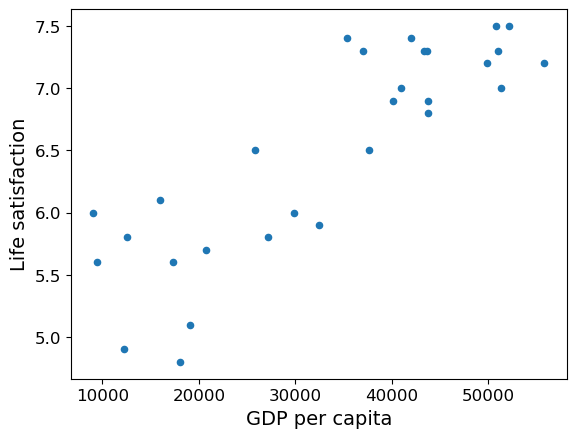

KNN Prediction for Cyprus: 5.77
Linear Regression Prediction for Cyprus: 5.96


In [26]:
# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select and train a model
from sklearn.neighbors import KNeighborsRegressor

# Select a K-Nearest Neighbors model with k=3
knn_model = KNeighborsRegressor(n_neighbors=3)

# Train the KNN model
knn_model.fit(X, y)

# Make a prediction for Cyprus using the KNN model
X_new = [[22587]]  # Cyprus' GDP per capita from earlier in the exercise
y_pred_knn = knn_model.predict(X_new)
print(f"KNN Prediction for Cyprus: {y_pred_knn[0][0]:.2f}")
print(f"Linear Regression Prediction for Cyprus: {model.predict(X_new)[0][0]:.2f}")

KNN regression is a local estimator based on the neighborhood (in this case 3 neighbors), while linear regression is a global estimator based on a linear relationship between all the variables.

Even though it seems like they cannot be compared, they still both use the same scoring system of R², which makes em comparable.

This is mentioned on the scikit link, under the part score here --> https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#kneighborsregressor


### Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check
For this exercise we have to tune the k_neighbor parameter of the KNeighborsRegressor model to some different values and se what kinds of scores it will produce, alongside this we need to explain a little about those scores.

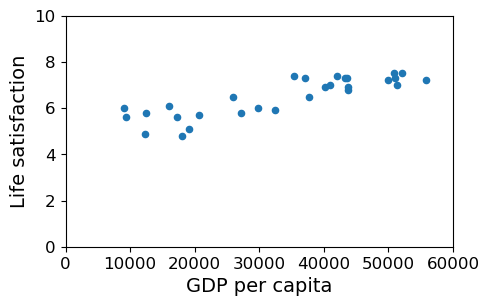

<Figure size 800x500 with 0 Axes>

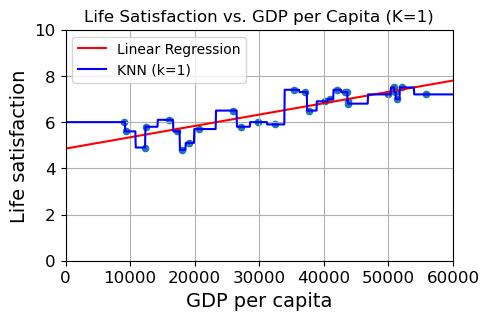

<Figure size 800x500 with 0 Axes>

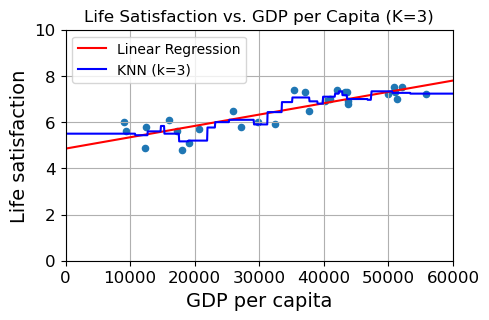

<Figure size 800x500 with 0 Axes>

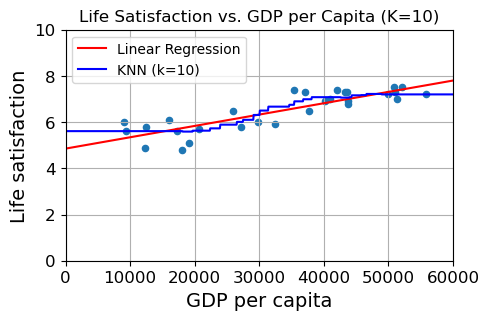

In [42]:
# Assuming model is the Linear Regression model and knn_model is the existing KNN model with k=3
# Sample data scatter plot
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5, 3))
plt.axis([0, 60000, 0, 10])

# Create a test matrix M, with values ranging from 0 to 60000 USD
m = np.linspace(0, 60000, 1000)  # Generate 1000 points from 0 to 60000
M = np.empty([m.shape[0], 1])
M[:, 0] = m

# Predict y values using Linear Regression and the existing KNN model
y_pred_lin = model.predict(M)    
y_pred_knn = knn_model.predict(M) 


# Testing different values of k_neighbors for KNN and replotting
for k in [1, 3, 10]:  # Experiment with different k values
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X, y)
    y_pred_knn = knn_model.predict(M)
    
    # Plot predictions with the updated k value
    plt.figure(figsize=(8, 5))
    sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5, 3))
    plt.axis([0, 60000, 0, 10])
    plt.plot(m, y_pred_lin, "r", label="Linear Regression")
    plt.plot(m, y_pred_knn, "b", label=f"KNN (k={k})")
    plt.legend()
    plt.xlabel("GDP per capita")
    plt.ylabel("Life satisfaction")
    plt.title(f"Life Satisfaction vs. GDP per Capita (K={k})")
    plt.grid(True)
    plt.show()



The k_neighbor=1 has such a good score cause it just looking for its nearest neighboor to graph to, essentially making a straight line between all points, thats why it "fits" so well and gets a score of 1.

An R-score of 1: 'A perfect score' is often a red flag for so called 'overfitting'.

Higher k values (3 or 10) strike a balance between fitting the data and avoiding excessive sensitivity to outliers, that  come from a dataset with mistakes.

In general a score of 1 is not very good in this scenario.


### 1.5.3. Qd) Trying out a Neural Network
We now have to try a neural network on the data specifically the one from the scikit-learns multi-layer perceptron regression called "MLPRegressor".

MLP Prediction for Cyprus: -295.12
MLPRegressor Training Score: -340237.184


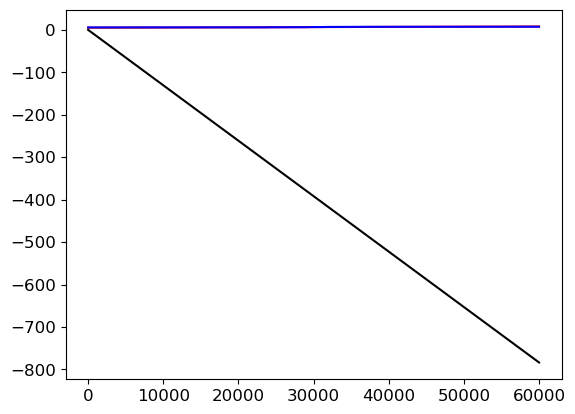

In [51]:
from sklearn.neural_network import MLPRegressor

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=False)
mlp.fit(X, y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M) 

plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_mlp, "k")

# TODO: add your code here..
X_new = [[22587]]  # GDP per capita for Cyprus
y_pred_cyprus = mlp.predict(X_new)
print(f"MLP Prediction for Cyprus: {y_pred_cyprus[0]:.2f}")

# Fetch the score of the MLPRegressor on the training data
mlp_score = mlp.score(X, y)
print(f"MLPRegressor Training Score: {mlp_score:.3f}")

## L01/Modules_and_classes

#### Qa Load and test the `libitmal` module
So in this exercise we need to try and load and test the libitmal module

In [1]:
# Try importing the module again
from libitmal import utils as itmalutils

# Test the module
print(dir(itmalutils))
print(itmalutils.__file__)
itmalutils.TestAll()

['AssertInRange', 'CheckFloat', 'DToXy', 'GenerateConfusionMatrix', 'GenerateResults', 'InRange', 'Iterable', 'ListToMatrix', 'ListToVector', 'PrintMatrix', 'ResetRandom', 'ShowResult', 'TEST', 'TestAll', 'TestCheckFloat', 'TestPrintMatrix', 'TestVarName', 'VarName', 'XyToD', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'ctxlib', 'inf', 'inspect', 'isFloat', 'isList', 'isNumpyArray', 'nan', 'np', 'random', 're', 'sklearn']
C:\Users\jeppe\Desktop\MAL\gitmal-master\libitmal\utils.py
TestPrintMatrix...(no regression testing)
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
X=[[ 1.  2.]
   ...
   [ 1. -1.]]
X=[[   1.
       2.    ]
   [   3.0001
    -100.    ]
   [   1.
      -1.    ]]
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
OK
TEST: OK
ALL OK


So for this we  had to both enter in the systempath to the gitmal-master folder, but also find out ourselves that it is NOT to the itmal folder but the parent folder containing the itmal folder... The path was for us C, then users, then jeppe, then Desktop, then MAL, then gitmal-master.


#### Qb Create your own module, with some functions, and test it
We need to create our own module, with some functions and test it, by loading it into our notebook. We also need to document the particular library setup.

In [22]:
# Import the module
from libitmal import functions as Qb

# Test functions
print(Qb.greet("Carsten")) 
print(Qb.add(5, 7))       

Hello, Carsten!
12


As you can see our function works and prints, we have it stored inside of libitmal, which would be /Users/jeppe/Desktop/MAL/gitmal-master/libitmal/functions.py

#### Qc How do you 'recompile' a module?
So when chaning module code, Jupyter will keep running on the old module. So we need to force the jupyter notebook to reload the module changes.

In [28]:
import importlib
from libitmal import functions as Qc

# Initially import the module
print(Qc.greet("Carsten"))

# Reload the module to apply changes
importlib.reload(Qc)

# Test the updated module
print(Qc.greet("Carsten")) 

Hello, Carsten!
Hello, der er nu lavet om i tingene Carsten!


So it can be done with importlib.reload

#### Qe Extend the class with some public and private functions and member variables
So we need to extend the class with som public and private functions and member variables, while explaining how you present them as private in python, what the meaning of self is in python and what happens to a function inside a class if you forget self the parameter list, like `def myfun():` instead of `def myfun(self):`.

In [32]:
class MyClass:
    class_var = "class variable"

    def __init__(self, age):
        self.myvar = "blah"
        self.__private_var = "private blah"
        self.age = age

    def myfun(self):
        print(f"This is a message inside the class, myvar={self.myvar}.")

    def __private_fun(self):
        print(f"This is a private method, accessing __private_var={self.__private_var}.")

    def call_private_fun(self):
        self.__private_fun()
        print("Private function called from a public function.")

    def __str__(self):
        return f"(MyClass(age: {self.age})"

myobjectx = MyClass()
myobjectx.myfun()
print(f"Accessing public variable directly: {myobjectx.myvar}")


print(f"Accessing class variable: {MyClass.class_var}")
try:
    myobjectx.__private_fun()
except AttributeError as e:
    print(f"Error calling private function directly: {e}")

# Correct way to call a private function indirectly
myobjectx.call_private_fun()



This is a message inside the class, myvar=blah.
Accessing public variable directly: blah
Accessing class variable: class variable
Error calling private function directly: 'MyClass' object has no attribute '__private_fun'
This is a private method, accessing __private_var=private blah.
Private function called from a public function.



In Python, private members (variables and methods) are indicated by prefixing them with double underscores.

self is a reference to the current instance of the class and is used to access variables and methods that belong to the instance. It's essentially how instance variables and methods are accessed and modified.

If you define a method inside a class without including self in the parameter list, Python will treat it as a function that does not belong to the instance. Attempting to call such a function will result in an error TypeError. This happens because Python implicitly passes the instance (self) as the first argument when calling methods on an object.

#### Qf Extend the class with a Constructor
We need to extend the class with a constructor, finding a way to declare and define it in python. While explaining if there is a class destructor in python and why it has or doesnt have one. 

This has been done in the code from Qe, to declare a constructor, we do so with the function __init__(self). 

and according to https://pythonprogramminglanguage.com/destructor/ python automatically comes with an implicit empty destructro def __del__(self). It also states, that according to the website it is primarily done so there "is a way to execute operations just before an object is purged from memory"

#### Qg Extend the class with a to-string function
We need to find a way to serialize a class, to make some tostring() functionality similar to c++

So as far as we could read on https://docs.python.org/2/library/functions.html#str the function __str__(self) does the functionality, so we added a new part in the constructor, which again is done up in Qe     

def __init__(self, age):
        self.age = age

as seen here the age par specifically with a constructor parameter.

   def __str__(self):
        return f"(MyClass(age: {self.age})"

and then we added the function itself as seen here where we return the age if the constructor had an age added.

## L02/Cost_function

#### Qa Given the following $\mathbf{x}^{(i)}$'s, construct and print the $\mathbf X$ matrix in python.

So we have to make matrix using numpy np.array for the following data

$$
\begin{array}{rl}
    \mathbf{x}^{(1)} &= [1, 2, 3]^T \\
    \mathbf{x}^{(2)} &= [4, 2, 1]^T \\
    \mathbf{x}^{(3)} &= [3, 8, 5]^T \\
    \mathbf{x}^{(4)} &= [-9, -1, 0]^T \\
\end{array}
$$

In [117]:
# Qa

import numpy as np

y = np.array([1,2,3,4]) # NOTE:  you'll need this later

X1 = np.array([1, 2, 3])
X2 = np.array([4, 2, 1])
X3 = np.array([3, 8, 5])
X4 = np.array([-9, -1, 0])


X = np.row_stack((X1, X2, X3, X4))

# Print the resulting matrix
print(X)


[[ 1  2  3]
 [ 4  2  1]
 [ 3  8  5]
 [-9 -1  0]]


#### Qb: Implement the L1 and L2 norms for vectors in Python.
$$
    \def\rem#1{}
    \rem{ITMAL: CEF def and LaTeX commands, remember: no  newlines in defs}
    \def\eq#1#2{#1 &=& #2\\}
    \def\ar#1#2{\begin{array}{#1}#2\end{array}}
    \def\ac#1#2{\left[\ar{#1}{#2}\right]}
    \def\st#1{_{\scriptsize\textrm{#1}}}
    \def\norm#1{{\cal L}_{#1}}
    \def\obs#1#2{#1_{\textrm{obs}}^{\left(#2\right)}}
    \def\diff#1{\mathrm{d}#1}
    \def\pfrac#1#2{\frac{\partial~#1}{\partial~#2}}
    \def\dfrac#1#2{\frac{\mathrm{d}~#1}{\mathrm{d}#2}}
    \def\pown#1{^{(#1)}}
    \def\pownn{\pown{n}}
    \def\powni{\pown{i}}
    \def\powtest{\pown{\scriptsize\textrm{test}}}
    \def\powtrain{\pown{\scriptsize\textrm{train}}}
    \def\pred{\st{pred}}
    \def\bM{\mathbf{M}}
    \def\bX{\mathbf{X}}
    \def\bZ{\mathbf{Z}}
    \def\bm{\mathbf{m}}
    \def\bx{\mathbf{x}}
    \def\by{\mathbf{y}}
    \def\bz{\mathbf{z}}
    \def\bw{\mathbf{w}}
    \def\btheta{{\boldsymbol\theta}}
    \def\bSigma{{\boldsymbol\Sigma}}
    \def\half{\frac{1}{2}}
$$
So using these two definitions, we are going to implement the math functions, using only low level implementation.

The squared $\norm{2}$ for a vector can compactly be expressed via 

$$
    \norm{2}^2: ||\bx||_2^2 = \bx^\top\bx
$$


The $\norm{1}$ 'City-block' norm is given by

$$
    \norm{1}:~~ ||\bx||_1 = \sum_i |x_i|
$$

In [207]:
import numpy as np
import math

def L1(v1, v2):
    # Check if the vectors are of the same length
    if len(v1) != len(v2):
        raise ValueError("Input vectors must be of the same length")
    
    # Check if vectors are empty
    if len(v1) == 0:
        raise ValueError("Input vectors cannot be empty")

    sum_abs = 0
    for a, b in zip(v1, v2):
        diff = a - b
        if diff < 0:
            diff = -diff 
        sum_abs += diff
    return sum_abs

def L2(v1, v2):
    # Check if the vectors are of the same length
    if len(v1) != len(v2):
        raise ValueError("Input vectors must be of the same length")
    
    # Check if vectors are empty
    if len(v1) == 0:
        raise ValueError("Input vectors cannot be empty")

    sum_squares = 0
    for a, b in zip(v1, v2):
        diff = a - b
        sum_squares += diff ** 2  
    return sum_squares ** 0.5 

def L2Dot(vector):
    return np.dot(vector, vector) ** 0.5  

# Define your vectors
tx = np.array([1, 2, 3, -1])
ty = np.array([3, -1, 4, 1])


print("L1 Distance (City Block):", d1)
print("L2 Distance (Euclidean):", d2)

expected_d1 = 8.0
expected_d2 = 4.242640687119285

# Compute distances with numpy arrays
d1 = L1(tx, ty)
d2 = L2(tx, ty)

print(f"tx-ty={tx - ty}, d1-expected_d1={d1 - expected_d1}, d2-expected_d2={d2 - expected_d2}")

eps = 1E-9
assert math.fabs(d1 - expected_d1) < eps, "L1 dist seems to be wrong"
assert math.fabs(d2 - expected_d2) < eps, "L2 dist seems to be wrong"

print("OK(part-1)")

# Compute L2Dot distance
d2dot = L2Dot(tx - ty)
print("d2dot-expected_d2=", d2dot - expected_d2)
assert math.fabs(d2dot - expected_d2) < eps, "L2Dot dist seems to be wrong"

print("OK(part-2)")


L1 Distance (City Block): 8
L2 Distance (Euclidean): 4.242640687119285
tx-ty=[-2  3 -1 -2], d1-expected_d1=0.0, d2-expected_d2=0.0
OK(part-1)
d2dot-expected_d2= 0.0
OK(part-2)


We get the expected results that the teachers premade code checks, so we did it correctly!

### Qc Construct the Root Mean Square Error (RMSE) function (Equation 2-1 [HOML]).

So we need to call the function RMSE and use it on our x and y matrix from the, this is RMSE function needs to call our previously implemented L2. RMSE needs to be implemented so it follows the establised math as described here.



"Now, let us take a look on how you calculate the MSE.

The MSE uses the $\norm{2}$ norm internally, well, actually $||\cdot||^2_2$ to be precise, and basically just sums, means and roots the individual (scalar) losses (distances), we just saw before. 

And the RMSE is just an MSE with a final square-root call."

In [209]:
def RMSE(predictions, y):
    # Check if the vectors are of the same length
    if len(predictions) != len(y):
        raise ValueError("Predictions and actual values must be of the same length")
    
    # Check if vectors are empty
    if len(predictions) == 0:
        raise ValueError("Predictions and actual values cannot be empty")

    # Compute RMSE using the L2 function, adjusting for the mean
    rmse = L2(predictions, y) / (len(y) ** 0.5)
    return rmse

# Extract the first column of X as predictions
predictions = h(X)

# Evaluate the RMSE
result = RMSE(predictions, y)
print("Predictions:", predictions)
print("Actual:", y)
print("RMSE:", result)

# Dummy h function:
def h(X):    
    if X.ndim!=2:
        raise ValueError("excpeted X to be of ndim=2, got ndim=",X.ndim)
    if X.shape[0]==0 or X.shape[1]==0:
        raise ValueError("X got zero data along the 0/1 axis, cannot continue")
    return X[:,0]

# Calls your RMSE() function:
r=RMSE(h(X),y)

# TEST vector:
eps=1E-9
expected=6.57647321898295
print(f"RMSE={r}, diff={r-expected}")
assert math.fabs(r-expected)<eps, "your RMSE dist seems to be wrong" 

print("OK")

Predictions: [ 1  4  3 -9]
Actual: [1 2 3 4]
RMSE: 6.576473218982953
RMSE=6.576473218982953, diff=2.6645352591003757e-15
OK


As we can see, we manages to pass the test written by the teachers, so our code is good!

### Qd Similar construct the Mean Absolute Error (MAE) function (Equation 2-2 [HOML]) and evaluate it.

So now we will implement the MAE function, which utilizes L1 instead of L2. Here we also have to make sure not to reimplement L1, but rather call it from our previous exercise.

In [215]:
def MAE(predictions, y):
    # Check if the vectors are of the same length
    if len(predictions) != len(y):
        raise ValueError("Predictions and actual values must be of the same length")
    
    # Check if vectors are empty
    if len(predictions) == 0:
        raise ValueError("Predictions and actual values cannot be empty")

    # Use L1 to calculate the sum of absolute differences
    sum_abs = L1(predictions, y)
    
    # Calculate the mean of the absolute errors (MAE)
    mae = sum_abs / len(y)
    return mae

# Calls your MAE function:
r=MAE(h(X), y)

# TEST vector:
expected=3.75
print(f"MAE={r}, diff={r-expected}")
assert math.fabs(r-expected)<eps, "MAE dist seems to be wrong" 

print("OK")

MAE=3.75, diff=0.0
OK


### Qe Robust Code
So we need to add error checking code for our L1, L2 and the MSE and MAE.

so as seen in the code above, we added code to check that the vectors are of the same length, if the vectors are empty in all 4 of the.

### QF Conclusion
We have to write a short conclusion on what we learned or got out of the exercise.

If we have to be honest we dont think it was very important or a good use of our time to reintroduce how you can do these mathmatical functions. What we suppose was the essence to learn here, was to understand how to better utilize python, reuse modules and code to make our own versions of functions, which we suppose already exists in a library. 

While it is a novel and good beginners method of learning a programming language, when on a 6th semester of classes in a higher coding environment like machine learning, it feels like a complete waste of time. 

The only real thing we truly learned was reading the questions that talked about the actual math formulas themselves and what they did and or how they function. When the implementation of the exercise itself learned us nothing we havent already done for 3+ years now in several other courses.

As we can see, the mlpregressor only managed to run some iterations and reaches mostly negative scores, meaning that it is a very poor fit for the model, this is also confirmed by its predicted age for Cyprus of ranging from often minus numbers to very low 1 digit positive ones, which isnt very normal for a modern country.

Since all 3 models use the same scoring method it is possible to compare the scores, however there can be some small things to look out for like over/underfitting and the sizes of the datasets.

## L02/dummy_classifier

#### Qa  Load and display the MNIST data
In order to load data correctly and easily from the MNIST dataset, a function `MNIST_getDataSet()` is created.
Here the parameter `return_X_y` is set to True such that data are returned as (data, target). In HOML it is advised that parameter as_frame = False such that data and target are NumPy arrays, istead of pandas DataFrame.
Data is checked for correct dimensions, before it is returned. If dimensions are incorrect .reshape() is used to reshape data to correct shape.

In [ ]:
def MNIST_getDataSet():
    #Fetch data
    from sklearn.datasets import fetch_openml
    X, y = fetch_openml('mnist_784', return_X_y = True ,as_frame = False)
    
    # #Check data shape of X
    if X.ndim==3:
        print("reshaping X..")
        assert y.ndim==1
        X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
    assert X.ndim==2, "X.dim not corret"
    print(f"X.shape={X.shape}")

    return X, y

In [ ]:
#Use function to load data into values X = Data and y = target
X, y = MNIST_getDataSet()

c:\Users\Niels\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


X.shape=(70000, 784)


A function `MNIST_PlotDigit()` is created. This lets us view a single element from the MNIST dataset. Here the matplotlib library is imported and used to plot a 28x28 picture of the element.

In [ ]:
# Function to view an single element from the dataset
%matplotlib inline
def MNIST_PlotDigit(data):
    import matplotlib
    import matplotlib.pyplot as plt
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

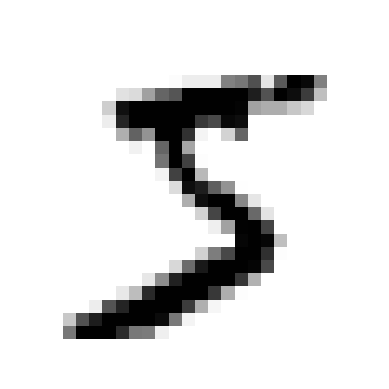

In [ ]:
#Example: Plotting a element [0] from data
some_data = X[0]
MNIST_PlotDigit(some_data)

#### Qb  Add a Stochastic Gradient Decent [SGD] Classifier

The MNIST data is split into training (X_train and y_train) and test (X_test and y_test) data.
Furthermore, since we are interested only in beeing able to predict whether a character is of the type "5" og "not 5" (binary classification), we only use the "5" label from the y_train and y_test datasets. These are stored in two new sets, y_train_5 and y_test_5.

A stochastic gradient descent (SGD) model is used to fit data and to predict data from the X_test testdata.

In [ ]:
# Split test/train data
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# Only use y data with label "5"
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

#Add SGDClassifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
#Fit model
sgd_clf.fit(X_train,y_train_5)
#Use model to predict labels from the X_test dataset
y_pred_SGD = sgd_clf.predict(X_test)

To check how well the SGD model performed on our data, we look for predicted "5" elements from the X_test dataset and visualize these, with our `MNIST_PlotDigit()` function. Here the NumPy method .where(condition == statement) can be used to find indices of predicted "5" (true_indices) in the prediction dataset.

(array([  15,   23,   45, ..., 9967, 9988, 9998], dtype=int64),)


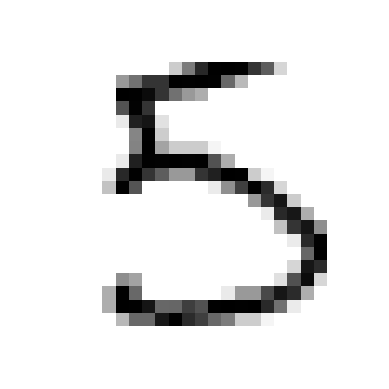

In [ ]:
# Get corret ones and plot
import numpy as np
# Get the indices of True elements
true_indices = np.where(y_pred_SGD == True)
print(true_indices)

# Plot some of the predicted elements
MNIST_PlotDigit(X_test[15]) # Seems correct
#MNIST_PlotDigit(X_test[23]) # Also seems correct
#MNIST_PlotDigit(X_test[9967]) # NOT CORRECT, this is an 8

#### Qc Implement a dummy binary classifier

A dumb classifier, `DummyClassfier`, is implemented as seen below. The classifier "looks" like the BaseEstimator class (contains similar methods) and thus behaves like an estimator.
Here the DummyClassifiers `fit()` leaves data unaltered and `predict()` always returns a matrix containing only ones (all preditions says true).

In [ ]:
class DummyClassfier:
    def __init__(self, param=None):
        self._param = param
    def get_params(self):
        return self._param
    def set_params(self,value):
        self._param = value
    def fit(self, X, y=None): #Leaves data unaltered
        pass
    def predict(self,X): #Always predicits True
        assert X.ndim==2
        return np.ones(X.shape[0],dtype=bool)
    def score(self,y_true,y_pred):
        return 1

An object of the `DummyClassfier` is created and used to fit and predict data from the X_train and y_train_5 datasets. Afterwards the accuracy of the predictions is tested using the accuracy_score funcion from the sklearn.metrics library. Here data must be comparable and thus data in the y_test dataset is converted to boolean True/False values (True="5" and False = not "5") in the y_test_bool dataset.

In [ ]:
# Create DummyClassifier object and fit/predict
DuCs = DummyClassfier()
DuCs.fit(X_train,y_train_5)
y_pred_Dummy = DuCs.predict(X_test)

#Test accuracy
from sklearn.metrics import accuracy_score
y_test_bool = [value == '5' for value in y_test] #Converting data to True/False
accuracy = accuracy_score(y_test_bool, prediction_dumb)
print(f"Accuracy: {accuracy}")


Accuracy: 0.0892


Accuracy is low, as the estimator predicts every data to be of the label "5", which is not the case in the y_test dataset (here only few elemtents contains the label "5").
In HOML accuracy is very large for the implemented DummyClassifier. This i caused by the book choosing a predict() function predicting all values to be False = not "5". Since most elements in dataset is not "5", the accuracy will be large.

#### Qd Conclusion

From Qa we learn how to lead data from a given dataset. We also study the data closely by visualizing a single element of the MNIST dataset, to get an idea of the type of data we are working with (hand written characters with 28x28 pixels).
In Qb we split data into a test and train dataset. Afterwards we use a stochastic gradient descent model from sklean to fit model from the test data, and test the models predictions on the test dataset. Lastly we try to plot some of the predicted elements containing a "5". Most seems true but some are off. This gives a good simple introduction on how to split data into test and train and to use a model with these data.
In Qc a dummy classifier is created, which predicts every element to be of the type "5". This gives an insight into what a simple classifier class contains (fit, predict, score, get/set). Also accuracy score comparrison between our DumbClassifier and the HOML classifier gives insight into how the accuracy can me misused/misinterpreted if data is skewered (many or few data of one type).


## L02/performance_metrics


#### Tidligere funktioner

In [ ]:
#Dataloader
def MNIST_getDataSet():
    #Get data
    from sklearn.datasets import fetch_openml
    X, y = fetch_openml('mnist_784', return_X_y = True ,as_frame = False)
    
    # #Check data shape of X
    if X.ndim==3:
        print("reshaping X..")
        assert y.ndim==1
        X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
    assert X.ndim==2, "X.dim not corret"
    print(f"X.shape={X.shape}")

    return X, y

In [ ]:
#Get data
X, y = MNIST_getDataSet()

c:\Users\Niels\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


X.shape=(70000, 784)


In [ ]:
# Split test/train data
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [ ]:
#Add SGDClassifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
#Fit and predict
sgd_clf.fit(X_train,y_train_5)
y_pred_SGD = sgd_clf.predict(X_test)

In [ ]:
#Add Dummy classifier and fit
import numpy as np
class DummyClassfier:
    def fit(self, X, y=None):
        pass
    def predict(self,X):
        assert X.ndim==2
        return np.ones(X.shape[0],dtype=bool)
# Create object and fit/predict
DuCs = DummyClassfier()
DuCs.fit(X_train,y_train)
y_pred_Dummy = DuCs.predict(X_test)

#### Qa Implement the Accuracy function and test it on the MNIST data.

Accuracy, as defined mathematically below, is a measurement of a models true predictions compared to total number of true and false predictions. Here TP = true positive, TN = true negative, FP = false positive and FN = false negative.

$$
    \def\by{\mathbf{y}}
    \def\bM{\mathbf{M}}
    \def\ar#1#2{\begin{array}{#1}#2\end{array}}
    \def\st#1{_{\scriptsize\textrm{#1}}}
    \def\myfrac#1#2{\frac{#1\rule{0pt}{8pt}}{#2\rule{0pt}{8pt}}} 
$$

$$
  \ar{rl}{
      accuracy &= \myfrac{TP + TN}{TP + TN + FP + FN}\\
  }
$$

An accuracy function, `MyAccuracy()`, is implemented below. It compares values from a test_set (here y_test is converted to true="5" and false="not 5") and models predictions, y_pred. For each predictions a comparrision with true values is made and corresponding type of prediction (TP/TN/FP/FN) is summed.
Lastly the accuracy is calculated from definition.

A test of the funtion, `TestAccuracy()`, is also made by comparrison with sklearn.metrics accuracy_score function.


In [ ]:
y_true = [value == '5' for value in y_test] #Converting data to True/False

def MyAccuracy(y_true, y_pred):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(len(y_true)): #Count type
        if y_true[i] == True and y_pred[i] == True: tp += 1
        elif y_true[i] == False and y_pred[i] == True: fp += 1
        elif y_true[i] == True and y_pred[i] == False: fn += 1
        else: tn += 1
    assert (tp + tn + fp + fn) != 0, "Denominator 0!"
    return (tp + tn)/(tp + tn + fp + fn)

# TEST FUNCTION: example of a comperator, using Scikit-learn accuracy_score
from sklearn.metrics import accuracy_score
import math
def TestAccuracy(y_true, y_pred):
   a0=MyAccuracy(y_true, y_pred)
   a1=accuracy_score(y_true, y_pred)
   eps=1E-9
   assert math.fabs(a0-a1)<eps, f"Your function {a0} vs sklearn {a1}" 
   print("Test passed")

# Test MyAccuracy() with y_true and y_pred_SGD
TestAccuracy(y_true,y_pred_SGD)
TestAccuracy(y_true,y_pred_Dummy)

Test passed
Test passed


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models

Next, functions `MyPrecision`, `MyRecall` and `MyF1Score` are implemented in a similar way to `MyAccuracy()`, based on the mathematical definitions as shown here:

$$
\ar{rl}{
  precision &= \myfrac{TP}{TP + FP}
}
$$

$$
  \ar{rl}{
    recall &= \myfrac{TP}{TP + FN}\\
  }
$$

$$
  \ar{rl}{
    F_1 &= \myfrac{2}{1/p + 1/r}
  }
$$

In [ ]:
def MyPrecision(y_true, y_pred):
    tp, fp = 0, 0
    for i in range(len(y_true)):
        if y_true[i] == True and y_pred[i] == True: tp += 1
        elif y_true[i] == False and y_pred[i] == True: fp += 1
    assert (tp + fp) != 0, "Denominator 0!"
    return tp/(tp + fp)

def MyRecall(y_true, y_pred):
    tp, fn = 0, 0
    for i in range(len(y_true)):
        if y_true[i] == True and y_pred[i] == True: tp += 1
        elif y_true[i] == True and y_pred[i] == False: fn += 1
    assert (tp + fn) != 0, "Denominator 0!"
    return (tp)/(tp + fn)
    
def MyF1Score(y_true, y_pred):
    return 2/(1/MyPrecision(y_true, y_pred)+1/MyRecall(y_true, y_pred))

Again a test function is created for each of the three functions above, comparing our function with precision, recall and F1 score functions from sklearn.metrics library.

In [ ]:
# TEST FUNCTIONS
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import math

def TestPrecision(y_true, y_pred):
   a0=MyPrecision(y_true, y_pred)
   a1=precision_score(y_true, y_pred)
   eps=1E-9
   assert math.fabs(a0-a1)<eps, f"Your function {a0} vs sklearn {a1}" 
   print("Test passed")

TestPrecision(y_true,y_pred_SGD)
TestPrecision(y_true,y_pred_Dummy)

def TestRecall(y_true, y_pred):
   a0=MyRecall(y_true, y_pred)
   a1=recall_score(y_true, y_pred)
   eps=1E-9
   assert math.fabs(a0-a1)<eps, f"Your function {a0} vs sklearn {a1}" 
   print("Test passed")

TestRecall(y_true,y_pred_SGD)
TestRecall(y_true,y_pred_Dummy)

def TestF1(y_true, y_pred):
   a0=MyF1Score(y_true, y_pred)
   a1 = f1_score(y_true, y_pred)
   eps=1E-9
   assert math.fabs(a0-a1)<eps, f"Your function {a0} vs sklearn {a1}" 
   print("Test passed")

TestF1(y_true,y_pred_SGD)
TestF1(y_true,y_pred_Dummy)

Test passed
Test passed
Test passed
Test passed
Test passed
Test passed


#### Qc The Confusion Matrix

The confusion matrix gives a nice overview of the amount of TP, FP, FN and TN from the model. From sklearn.metrics `confusion_matrix()` is imported and used to create a confusion matrix from our predictions and the true values. This is done for both the DummyClassifier model and the SGD model.

From sklearn documentation (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) the `confusion_matrix()` results in the matrix structed as shown here:
$$   
\bM\st{confusion}~~~ = 
\ar{l|ll}{
                             & \textrm{predicted false} & \textrm{predicted true} \\ \hline
    \textrm{actual false}  & TN & FP \\     
    \textrm{actual true} & FN & TP 
}
$$

In [ ]:
from sklearn.metrics import confusion_matrix
print(f"M_Dummy\n{confusion_matrix(y_true,y_pred_Dummy)}")
print(f"M_SGD\n{confusion_matrix(y_true,y_pred_SGD)}")

M_Dummy
[[   0 9108]
 [   0  892]]
M_SGD
[[8707  401]
 [ 107  785]]


Here we see that our dummy classifier guesses that all test_data are true (they are of the label "5") which in most cases is false, resulting in a false positive (upper right cell of the 2x2 matrix).

#### Qd A Confusion Matrix Heat-map

Another way to visualize the distribution of TP, FP, FN and TN is with a heat map. This can also be performed with a function from the sklearn.metrics, `ConfusionMatrixDisplay.from_precitions()` and plotted using pyplot from matplotlib.

Below, a heat map is plotted for both the DummyClassifier and the SGD model. The result is equivalent to the confusion matrix, but a colour gradient would give an easier overview if a multi-class classification model with many labels (for example all characters from 0 to 9) was used.


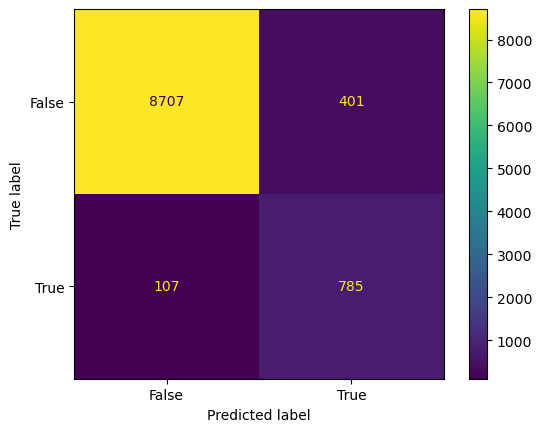

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true, y_pred_SGD)
plt.show()

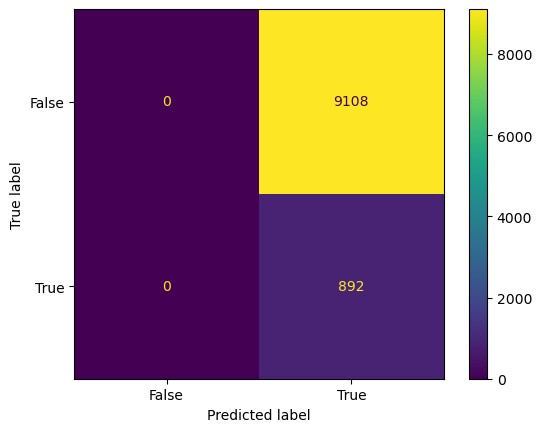

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true, y_pred_Dummy)
plt.show()

#### Qe Conclusion

From Qa an accuracy score function was implemented and tested against the accuracy function from sklearn. The accuracy is a metric for the fraction of true predictions (TP and TN) compared to the overall prediction type (TP, TN, FP and FN) and can be used to evaluate the models performance through a single score value.

In Qb precision, recall and F1 were implemented and tested similarly to the accuracy function.

Lastly in Qc and Qd prediction types (TP, TN, FP and FN) were visualized with a confusion matrix and a heat map. Both of these giving a good overview of model results, which is believed to come in handy, when later dealing with multiple classes instead of binary classes.